In [83]:
%matplotlib inline
import pandas as pd  
import numpy as np  
from scipy import  stats
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
#from pyramid.arima import auto_arima

### 数据读取

In [71]:
df = pd.read_csv('data3.csv',encoding='utf-8',index_col='Year')

## 平稳性检测

### 取对数 差分

In [72]:
ts = df['total']
ts_log = np.log(ts)
ts_log_minus1=np.diff(ts_log,1)
ts_log_minus2=np.diff(ts_log_minus1,1)

### ADF检验

In [73]:
print(adfuller(ts,autolag='t-stat'))
print(adfuller(ts_log, autolag='t-stat'))
print(adfuller(ts_log_minus1,autolag='t-stat'))
print(adfuller(ts_log_minus2,autolag='t-stat'))

(-2.1756361156524213, 0.21520665968775993, 5, 44, {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}, 2.1110815495127926)
(-3.161350277981025, 0.02233373905532227, 5, 44, {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}, 2.0018588581660817)
(-1.166914133044749, 0.6876640880490877, 9, 39, {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}, 1.8383891163586765)
(-3.9140636718165402, 0.0019337498437472299, 8, 39, {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}, 2.2690764244473476)


## 定阶

### AC PAC

D:\anaconda\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


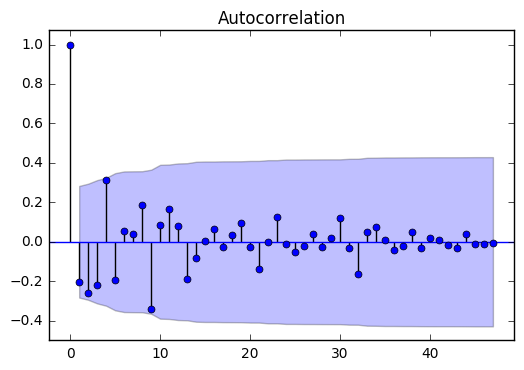

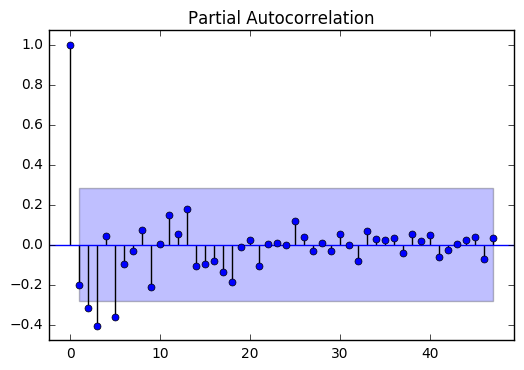

In [74]:
plot_acf(ts_log_minus2).show()
plot_pacf(ts_log_minus2).show()

### BIC法则

In [76]:
pmax = int(len(ts_log_minus2)/10) 
qmax = int(len(ts_log_minus2)/10)
bic_matrix = [] 
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
 #存在部分报错，所以用try来跳过报错。
    try: 
      tmp.append(ARIMA(ts_log_minus2, (p,1,q)).fit().bic)
    except:
      tmp.append(None)
  bic_matrix.append(tmp)

#从中可以找出最小值
bic_matrix = pd.DataFrame(bic_matrix) 
#先用stack展平，然后用idxmin找出最小值位置。
p,q = bic_matrix.stack().idxmin() 
print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 

D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\anaconda\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\anaconda\lib\site-pa

BIC最小的p值和q值为：1、4


D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [203]:
model = ARIMA(ts_log_minus2, (p,1,q)).fit() 
# model = ARIMA(ts_log_minus2, (0, 1, 0)).fit() 
model.summary2() 

D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\anaconda\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\anaconda\lib\site-pa

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 -158.5982
Dependent Variable: D.y              Log-Likelihood:      92.775   
Date:               2018-06-14 15:56 Scale:               1.0000   
No. Observations:   47               Method:              css-mle  
Df Model:           6                Sample:              1        
Df Residuals:       41                                    8        
Converged:          0.0000           S.D. of innovations: 0.030    
AIC:                -171.5492        HQIC:                -166.676 
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const        -0.0000     0.0001   -0.2418   0.8102   -0.0002   0.0002
ar.L1.D.y    -0.9465        nan       nan      nan       nan      nan
ma.L1.D.y    -0.1893        nan       nan      nan       nan      nan
ma.L2.D.y    -1.5880        nan       nan      nan       nan      nan
ma.L3.D.y    -0.0381        nan       nan      nan       nan      nan
ma.L4.D.y     0.8178        nan       nan      nan       nan      nan
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -1.0565             0.0000           1.0565             0.5000
MA.1          -1.0076            -0.3681           1.0728            -0.4443
MA.2          -1.0076             0.3681           1.0728             0.4443
MA.3           1.0150            -0.0000           1.0150            -0.0000
MA.4           1.0469            -0.0000           1.0469            -0.0000
===================================================================

"""

## 预测

In [204]:
def plot_train_pred(train, pred):
    num_train = len(train)
    num_pred = len(pred)
    plt.plot(range(num_train), train)
    plt.plot([x + num_train + 1 for x in list(range(num_pred))], pred, color='r')

D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


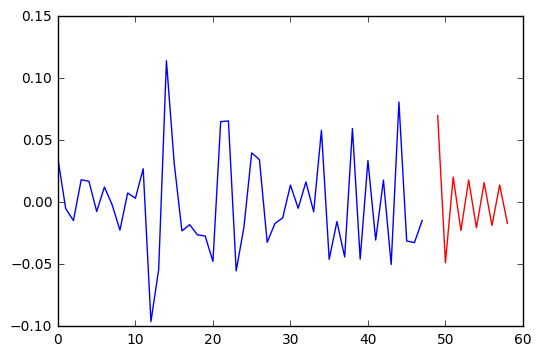

In [205]:
pred, _, _ = model.forecast(10)
train = ts_log_minus2
plot_train_pred(train, pred)

In [206]:
train_pred = np.concatenate([train, pred])

def un_diff(x, first):
    x = np.cumsum(x)
    x = x + first
    x = np.concatenate([[first], x])
    return x
print(train_pred)
train_pred = un_diff(train_pred, ts_log_minus1[0])
print(train_pred)
train_pred =  un_diff(train_pred, ts_log.values[0])
print(train_pred)
train_pred = np.exp(train_pred)

[ 0.03531927 -0.00497966 -0.01459554  0.01826301  0.01708567 -0.0072576
  0.01239832 -0.00200985 -0.02233258  0.00764893  0.00338776  0.02716538
 -0.09612279 -0.05404864  0.11425201  0.03175561 -0.02295739 -0.01790279
 -0.02613396 -0.02709022 -0.04759364  0.06517781  0.06572193 -0.05523139
 -0.01986475  0.03996301  0.03454271 -0.03216904 -0.01697507 -0.01247209
  0.01397115 -0.00467519  0.01653847 -0.00750953  0.05817594 -0.04586341
 -0.01540999 -0.04399631  0.05962733 -0.04573741  0.03383186 -0.03036689
  0.01798162 -0.05001569  0.08098119 -0.03107142 -0.03239293 -0.01452297
  0.06999818 -0.04863878  0.02044476 -0.02259751  0.01809957 -0.02046662
  0.01599363 -0.01856221  0.01410206 -0.01686069]
[ 0.00724952  0.0425688   0.03758913  0.02299359  0.0412566   0.05834227
  0.05108468  0.063483    0.06147315  0.03914057  0.0467895   0.05017726
  0.07734265 -0.01878015 -0.07282879  0.04142322  0.07317883  0.05022144
  0.03231865  0.00618469 -0.02090554 -0.06849918 -0.00332137  0.06240056
  

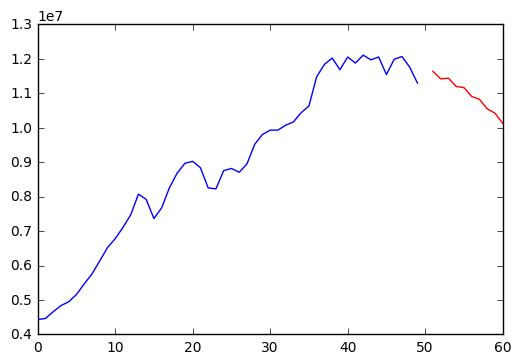

In [207]:
plot_train_pred(train_pred[:len(ts_log)], train_pred[len(ts_log):])

In [208]:
stepwise_fit = auto_arima(ts, start_p=1, start_q=1, max_p=4, max_q=4, m=25,
                          start_P=0, seasonal=False, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)  # set to stepwise

Fit ARIMA: order=(1, 1, 1); AIC=1382.907, BIC=1390.475, Fit time=0.153 seconds
Fit ARIMA: order=(0, 1, 0); AIC=1381.559, BIC=1385.343, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1381.195, BIC=1386.871, Fit time=0.038 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1380.945, BIC=1386.620, Fit time=0.040 seconds
Fit ARIMA: order=(0, 1, 2); AIC=1382.785, BIC=1390.352, Fit time=0.086 seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.356 seconds


D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of 